In [133]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('./235745_parking_data/train.csv')
test_df = pd.read_csv('./235745_parking_data/test.csv')
submission_df = pd.read_csv('./235745_parking_data/sample_submission.csv')
age_gender_df = pd.read_csv('./235745_parking_data/age_gender_info.csv')

In [134]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import platform
from matplotlib import font_manager, rc 
sns.set_style('darkgrid')

plt.rcParams["axes.unicode_minus"] = False 
get_ipython().run_line_magic("matplotlib", "inline")

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    rc("font", family="Malgun Gothic")
else:
    print("Unkown system. sorry~~")

In [135]:
age_gender_df.shape

(16, 23)

In [136]:
age_gender_df.head(3)

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066


In [137]:
age_gender_df['지역']

0        경상북도
1        경상남도
2       대전광역시
3         경기도
4        전라북도
5         강원도
6       광주광역시
7        충청남도
8       부산광역시
9     제주특별자치도
10      울산광역시
11       충청북도
12       전라남도
13      대구광역시
14      서울특별시
15    세종특별자치시
Name: 지역, dtype: object

In [138]:
train_df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [139]:
train_df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [140]:
len(train_df), len(test_df)

(2952, 1022)

In [141]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

- 단지코드: C + 4자리번호
- 총세대수: 단지 코드 별 총세대수 (분양 상가, 분양 아파트 포함)
- 임대건물구분 : c(아파트, 상가)
- 지역 : '경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도', '부산광역시',
       '제주특별자치도', '울산광역시', '충청북도', '전라남도', '경상북도', '대구광역시', '서울특별시',
       '세종특별자치시'
- 공급유형 : '국민임대', '공공임대(50년)', '영구임대', '임대상가', '공공임대(10년)', '공공임대(분납)',
       '장기전세', '공공분양', '행복주택', '공공임대(5년)'
- 전용면적 : 12.62 ~ 583.4 ($m^2?)$
- 전용면적적별세대수 : 전용면적 별 세대수 (분양 상가, 분양 아파트 미포함)
- 공가수 : 단지 코드 별 비어있는 호실 수
- 자격유형 : c('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O')
- 임대보증금 : 원 단위?
- 임대료 : 원 단위?
- 도보 10분거리 내 지하철역 수(환승노선 수 반영) : 0 ~ 3개 (단지 코드별)
- 단지내주차면수 : 13 ~ 1798 개 (단지 코드별)
- 등록차량수 : 13 ~ 2550 개 (단지 코드별)

In [142]:
train_df['단지코드'].nunique()

423

In [143]:
def print_na_value(train, test):
    train_copy = train.isna().sum().copy()
    test_copy = test.isna().sum().copy()
    print('='*60)
    print('Train Dataset>>>')
    print(train_copy.loc[train_copy!=0])
    print('='*60)
    print('Test Dataset>>>')
    print(test_copy.loc[test_copy!=0])

In [144]:
print_na_value(train_df, test_df)

Train Dataset>>>
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
dtype: int64
Test Dataset>>>
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
dtype: int64


---

# 데이터 오류

### 1. 전용면적별 세대수 합계와 총세대수가 일치하지 않는 경우  

In [145]:
train_df.iloc[:,:-1].shape, test_df.shape

((2952, 14), (1022, 14))

In [146]:
df_concat = pd.concat([train_df.iloc[:,:-1], test_df])
df_concat = df_concat[['단지코드', '총세대수', '전용면적별세대수']].pivot_table(index='단지코드', values=['총세대수', '전용면적별세대수'],
                                                  aggfunc={'총세대수': 'mean', '전용면적별세대수':'sum'})
df_concat['diff'] = df_concat['총세대수'] - df_concat['전용면적별세대수']
df_concat.loc[df_concat['diff'] != 0]

,전용면적별세대수,총세대수,diff
단지코드,,,
C1024,477,680,203
C1030,70,75,5
C1038,550,554,4
C1068,805,806,1
C1156,998,1004,6
C1206,488,755,267
C1218,1040,1048,8
C1229,450,453,3
C1266,591,596,5


-  (발생 원인) 차이는 분양상가 또는 분양아파트가 임대단지 안에 혼합되어 발생한 것으로, 분양 완료된 상가 ․ 아파트는 관리대상에서 제외되어 전용면적별 세대수에서는 포함되지 않았으나 총세대수에는 포함되었다.

- 방안 : 전용면적별 세대수를 총세대수 sum으로 update

In [147]:
df_concat = df_concat['전용면적별세대수'].reset_index()
df_concat.rename(columns={'전용면적별세대수': '총세대수'}, inplace=True)

train_df = train_df[['단지코드', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']]
train_df = train_df.merge(df_concat, on='단지코드')

In [148]:
test_df = test_df[['단지코드', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수']]
test_df = test_df.merge(df_concat, on='단지코드')

In [149]:
len(train_df), len(test_df)

(2952, 1022)

### 2. 동일한 단지에 단지코드가 2개로 부여된 경우
### 3. 단지코드 등 기입 실수로 데이터 정제 과정에서 매칭 오류 발생
- 오류 데이터 삭제

In [150]:
train_excl_code = ['C2085', 'C1397', 'C2431', 'C1649', 'C1036', 'C1095', 'C2051', 'C1218', 'C1894',
                  'C2483', 'C1502', 'C1988']
test_excl_code = ['C2675', 'C2335', 'C1327']

In [151]:
train_df = train_df.loc[train_df['단지코드'].isin(train_excl_code) == False]
test_df = test_df.loc[test_df['단지코드'].isin(test_excl_code) == False]

### 결측치 처리

In [152]:
len(train_df), len(test_df)

(2869, 1008)

In [153]:
print_na_value(train_df, test_df)

Train Dataset>>>
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    207
dtype: int64
Test Dataset>>>
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     38
dtype: int64


In [154]:
test_df.loc[(test_df['단지코드']=='C2411') & (test_df['자격유형'].isna()), '자격유형'] = 'A'
test_df.loc[(test_df['단지코드']=='C2253') & (test_df['자격유형'].isna()), '자격유형'] = 'C'

- test set이지만 데이터값 누락으로 수정

In [155]:
print_na_value(train_df, test_df)

Train Dataset>>>
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    207
dtype: int64
Test Dataset>>>
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     38
dtype: int64


In [156]:
train_df.loc[train_df['임대보증금']=='-']

,단지코드,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,총세대수
2547,C1326,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0,1934
2548,C1326,아파트,부산광역시,국민임대,24.79,104,43.0,H,-,-,0.0,4.0,1670.0,1153.0,1934
2549,C1326,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0,1934
2550,C1326,아파트,부산광역시,국민임대,37.70,464,43.0,H,-,-,0.0,4.0,1670.0,1153.0,1934
2551,C1326,아파트,부산광역시,국민임대,46.94,304,43.0,H,-,-,0.0,4.0,1670.0,1153.0,1934
2680,C1786,아파트,강원도,행복주택,16.91,156,25.0,K,-,-,0.0,3.0,338.0,345.0,480
2681,C1786,아파트,강원도,행복주택,26.90,136,25.0,K,-,-,0.0,3.0,338.0,345.0,480
2682,C1786,아파트,강원도,행복주택,26.90,72,25.0,K,-,-,0.0,3.0,338.0,345.0,480
2683,C1786,아파트,강원도,행복주택,26.90,24,25.0,K,-,-,0.0,3.0,338.0,345.0,480
2906,C2186,아파트,대구광역시,국민임대,29.17,238,0.0,H,-,-,0.0,8.0,664.0,744.0,916


In [157]:
print(train_df.loc[train_df['임대보증금'].str.isdecimal()==False, '임대보증금'].unique())
print(test_df.loc[test_df['임대보증금'].str.isdecimal()==False, '임대보증금'].unique())
print(train_df.loc[train_df['임대료'].str.isdecimal()==False, '임대료'].unique())
print(test_df.loc[test_df['임대료'].str.isdecimal()==False, '임대료'].unique())

['-']
['-']
['-']
['-']


In [158]:
train_df.loc[train_df['임대보증금']=='-', '임대보증금'] = np.nan
test_df.loc[test_df['임대보증금']=='-', '임대보증금'] = np.nan
train_df['임대보증금'] = train_df['임대보증금'].astype(float)
test_df['임대보증금'] = test_df['임대보증금'].astype(float)

train_df.loc[train_df['임대료']=='-', '임대료'] = np.nan
test_df.loc[test_df['임대료']=='-', '임대료'] = np.nan
train_df['임대료'] = train_df['임대료'].astype(float)
test_df['임대료'] = test_df['임대료'].astype(float)

In [159]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 8 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2869 non-null   object 
 1   임대건물구분                        2869 non-null   object 
 2   지역                            2869 non-null   object 
 3   공급유형                          2869 non-null   object 
 4   전용면적                          2869 non-null   float64
 5   전용면적별세대수                      2869 non-null   int64  
 6   공가수                           2869 non-null   float64
 7   자격유형                          2869 non-null   object 
 8   임대보증금                         2288 non-null   float64
 9   임대료                           2285 non-null   float64
 10  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2662 non-null   float64
 11  도보 10분거리 내 버스정류장 수            2869 non-null   float64
 12  단지내주차면수                       2869 non-null   float64
 13  등록차

In [160]:
print_na_value(train_df, test_df)

Train Dataset>>>
임대보증금                           581
임대료                             584
도보 10분거리 내 지하철역 수(환승노선 수 반영)    207
dtype: int64
Test Dataset>>>
임대보증금                           186
임대료                             186
도보 10분거리 내 지하철역 수(환승노선 수 반영)     38
dtype: int64


In [161]:
train_df.columns

Index(['단지코드', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
       '단지내주차면수', '등록차량수', '총세대수'],
      dtype='object')

### 자하철역 수 결측치 처리

In [162]:
train_df.rename(columns={'도보 10분거리 내 지하철역 수(환승노선 수 반영)': '지하철',
                         '도보 10분거리 내 버스정류장 수':'버스'}, inplace=True)
test_df.rename(columns={'도보 10분거리 내 지하철역 수(환승노선 수 반영)': '지하철',
                         '도보 10분거리 내 버스정류장 수':'버스'}, inplace=True)

In [163]:
len(train_df.loc[train_df['지하철'].isna()])

207

In [164]:
numeric_cols = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료',
               '지하철', '버스', '단지내주차면수','등록차량수']
train_df_interpolate = train_df[numeric_cols].interpolate()

- Option 1 : interpolate  nan 207개중  0 : 147개, 1 : 60개
- Option 2 : fillna(0)

In [165]:
subway_missing_option = 1
if subway_missing_option == 1:
    subway_missing_df =  train_df_interpolate.loc[train_df['지하철'].isna()]
    train_df.loc[subway_missing_df.loc[subway_missing_df['지하철']==1].index, '지하철'] = 1
    train_df.loc[subway_missing_df.loc[subway_missing_df['지하철']<1].index, '지하철'] = 0
elif subway_missing_option == 2:
    train_df.fillna({'지하철':0}, inplace=True)

In [166]:
test_df.fillna({'지하철':0}, inplace=True)

- test set의 지하철 결측치는 찾을 수 없어서 fillna(0)

In [167]:
print_na_value(train_df, test_df)

Train Dataset>>>
임대보증금    581
임대료      584
dtype: int64
Test Dataset>>>
임대보증금    186
임대료      186
dtype: int64


### 임대보증금, 임대료 결측치 처리
- Default : 실제 데이터를 찾아서 fillup
- Option 1 : 지역 + 공급유형병 평균값으로 대체
- Option 2 : fillna(0)

In [168]:
print('Train : 임대보증금, 임대료 결측값 : {0:.2f}%'.format(train_df['임대보증금'].isna().sum()/len(train_df)*100))
print('Test : 임대보증금, 임대료 결측값 : {0:.2f}%'.format(test_df['임대보증금'].isna().sum()/len(test_df)*100))

Train : 임대보증금, 임대료 결측값 : 20.25%
Test : 임대보증금, 임대료 결측값 : 18.45%


In [169]:
# 전용면적 16.91 
train_df.loc[(train_df['단지코드'] == 'C1786') & (train_df['전용면적'] == 16.91), '임대보증금'] = 13450000
train_df.loc[(train_df['단지코드'] == 'C1786') & (train_df['전용면적'] == 16.91), '임대료'] = 65500
# 전용면적 26.9
train_df.loc[(train_df['단지코드'] == 'C1786') & (train_df['전용면적'] == 26.9), '임대보증금'] = 19700000
train_df.loc[(train_df['단지코드'] == 'C1786') & (train_df['전용면적'] == 26.9), '임대료'] = 96000
# 전용면적 26.9
train_df.loc[(train_df['단지코드'] == 'C1786') & (train_df['전용면적'] == 26.9), '임대보증금'] = 19150000
train_df.loc[(train_df['단지코드'] == 'C1786') & (train_df['전용면적'] == 26.9), '임대료'] = 94000
# 전용면적 26.9
train_df.loc[(train_df['단지코드'] == 'C1786') & (train_df['전용면적'] == 26.9), '임대보증금'] = 21400000
train_df.loc[(train_df['단지코드'] == 'C1786') & (train_df['전용면적'] == 26.9), '임대료'] = 105000

# 전용면적 24.72
train_df.loc[(train_df['단지코드'] == 'C1326') & (train_df['전용면적'] == 24.72), '임대보증금'] = 7000000
train_df.loc[(train_df['단지코드'] == 'C1326') & (train_df['전용면적'] == 24.72), '임대료'] = 135000
# 전용면적 24.79
train_df.loc[(train_df['단지코드'] == 'C1326') & (train_df['전용면적'] == 24.79), '임대보증금'] = 7000000
train_df.loc[(train_df['단지코드'] == 'C1326') & (train_df['전용면적'] == 24.79), '임대료'] = 135000
# 전용면적 26.83
train_df.loc[(train_df['단지코드'] == 'C1326') & (train_df['전용면적'] == 26.83), '임대보증금'] = 7600000
train_df.loc[(train_df['단지코드'] == 'C1326') & (train_df['전용면적'] == 26.83), '임대료'] = 142000
# 전용면적 37.7
train_df.loc[(train_df['단지코드'] == 'C1326') & (train_df['전용면적'] == 37.7), '임대보증금'] = 14800000
train_df.loc[(train_df['단지코드'] == 'C1326') & (train_df['전용면적'] == 37.7), '임대료'] = 198000
# 전용면적 46.94
train_df.loc[(train_df['단지코드'] == 'C1326') & (train_df['전용면적'] == 46.94), '임대보증금'] = 23100000
train_df.loc[(train_df['단지코드'] == 'C1326') & (train_df['전용면적'] == 46.94), '임대료'] = 259000

# 전용면적 29.17
train_df.loc[(train_df['단지코드'] == 'C2186') & (train_df['전용면적'] == 29.17), '임대보증금'] = 10847000
train_df.loc[(train_df['단지코드'] == 'C2186') & (train_df['전용면적'] == 29.17), '임대료'] = 138600
# 전용면적 29.34
train_df.loc[(train_df['단지코드'] == 'C2186') & (train_df['전용면적'] == 29.34), '임대보증금'] = 10847000
train_df.loc[(train_df['단지코드'] == 'C2186') & (train_df['전용면적'] == 29.34), '임대료'] = 138600
# 전용면적 37.43
train_df.loc[(train_df['단지코드'] == 'C2186') & (train_df['전용면적'] == 37.43), '임대보증금'] = 17338000
train_df.loc[(train_df['단지코드'] == 'C2186') & (train_df['전용면적'] == 37.43), '임대료'] = 197500

# 전용면적 24.83
test_df.loc[(test_df['단지코드'] == 'C2152') & (test_df['전용면적'] == 24.83), '임대보증금'] = 2129000
test_df.loc[(test_df['단지코드'] == 'C2152') & (test_df['전용면적'] == 24.83), '임대료'] = 42350
# 전용면적 33.84
test_df.loc[(test_df['단지코드'] == 'C2152') & (test_df['전용면적'] == 33.84), '임대보증금'] = 2902000
test_df.loc[(test_df['단지코드'] == 'C2152') & (test_df['전용면적'] == 33.84), '임대료'] = 57730

# 전용면적 16.94
test_df.loc[(test_df['단지코드'] == 'C1267') & (test_df['전용면적'] == 16.94), '임대보증금'] = 11200000
test_df.loc[(test_df['단지코드'] == 'C1267') & (test_df['전용면적'] == 16.94), '임대료'] = 53200
# 전용면적 26.85
test_df.loc[(test_df['단지코드'] == 'C1267') & (test_df['전용면적'] == 26.85), '임대보증금'] = 16333330
test_df.loc[(test_df['단지코드'] == 'C1267') & (test_df['전용면적'] == 26.85), '임대료'] = 77580
# 전용면적 26.85
test_df.loc[(test_df['단지코드'] == 'C1267') & (test_df['전용면적'] == 26.85), '임대보증금'] = 18620000
test_df.loc[(test_df['단지코드'] == 'C1267') & (test_df['전용면적'] == 26.85), '임대료'] = 88440
# 전용면적 36.77
test_df.loc[(test_df['단지코드'] == 'C1267') & (test_df['전용면적'] == 36.77), '임대보증금'] = 23760000
test_df.loc[(test_df['단지코드'] == 'C1267') & (test_df['전용면적'] == 36.77), '임대료'] = 112860

# 전용면적 26.37
test_df.loc[(test_df['단지코드'] == 'C1006') & (test_df['전용면적'] == 26.37), '임대보증금'] = 5787000
test_df.loc[(test_df['단지코드'] == 'C1006') & (test_df['전용면적'] == 26.37), '임대료'] = 79980
# 전용면적 52.74
test_df.loc[(test_df['단지코드'] == 'C1006') & (test_df['전용면적'] == 52.74), '임대보증금'] = 11574000
test_df.loc[(test_df['단지코드'] == 'C1006') & (test_df['전용면적'] == 52.74), '임대료'] = 159960

In [170]:
train_df[train_df['임대보증금'].isnull()]['공급유형'].value_counts()

임대상가    562
공공분양      7
Name: 공급유형, dtype: int64

In [171]:
# 임대상가의 임대료와 임대보증금은 해당 지역의 평균값으로 대체

## 임대 상가의 임대료 처리 
train_df.loc[train_df['지역'] == '부산광역시', '임대료'] = train_df['임대료'].fillna(train_df[train_df['지역'] == '부산광역시']['임대료'].mean())
train_df.loc[train_df['지역'] == '대전광역시', '임대료'] = train_df['임대료'].fillna(train_df[train_df['지역'] == '대전광역시']['임대료'].mean())
train_df.loc[train_df['지역'] == '경상남도', '임대료'] = train_df['임대료'].fillna(train_df[train_df['지역'] == '경상남도']['임대료'].mean())
train_df.loc[train_df['지역'] == '충청남도', '임대료'] = train_df['임대료'].fillna(train_df[train_df['지역'] == '충청남도']['임대료'].mean())
train_df.loc[train_df['지역'] == '강원도', '임대료'] = train_df['임대료'].fillna(train_df[train_df['지역'] == '강원도']['임대료'].mean())
train_df.loc[train_df['지역'] == '제주특별자치도', '임대료'] = train_df['임대료'].fillna(train_df[train_df['지역'] == '제주특별자치도']['임대료'].mean())

test_df.loc[test_df['지역'] == '부산광역시', '임대료'] = test_df['임대료'].fillna(train_df[train_df['지역'] == '부산광역시']['임대료'].mean())
test_df.loc[test_df['지역'] == '대전광역시', '임대료'] = test_df['임대료'].fillna(train_df[train_df['지역'] == '대전광역시']['임대료'].mean())
test_df.loc[test_df['지역'] == '울산광역시', '임대료'] = test_df['임대료'].fillna(train_df[train_df['지역'] == '울산광역시']['임대료'].mean())
test_df.loc[test_df['지역'] == '충청남도', '임대료'] = test_df['임대료'].fillna(train_df[train_df['지역'] == '충청남도']['임대료'].mean())
test_df.loc[test_df['지역'] == '강원도', '임대료'] = test_df['임대료'].fillna(train_df[train_df['지역'] == '강원도']['임대료'].mean())  

## 임대 상가의 임대보증금 처리 
train_df.loc[train_df['지역'] == '부산광역시', '임대보증금'] = train_df['임대보증금'].fillna(train_df[train_df['지역'] == '부산광역시']['임대보증금'].mean())
train_df.loc[train_df['지역'] == '대전광역시', '임대보증금'] = train_df['임대보증금'].fillna(train_df[train_df['지역'] == '대전광역시']['임대보증금'].mean())
train_df.loc[train_df['지역'] == '경상남도', '임대보증금'] = train_df['임대보증금'].fillna(train_df[train_df['지역'] == '경상남도']['임대보증금'].mean())
train_df.loc[train_df['지역'] == '충청남도', '임대보증금'] = train_df['임대보증금'].fillna(train_df[train_df['지역'] == '충청남도']['임대보증금'].mean())
train_df.loc[train_df['지역'] == '강원도', '임대보증금'] = train_df['임대보증금'].fillna(train_df[train_df['지역'] == '강원도']['임대보증금'].mean())
train_df.loc[train_df['지역'] == '제주특별자치도', '임대보증금'] = train_df['임대보증금'].fillna(train_df[train_df['지역'] == '제주특별자치도']['임대보증금'].mean())

test_df.loc[test_df['지역'] == '부산광역시', '임대보증금'] = test_df['임대보증금'].fillna(train_df[train_df['지역'] == '부산광역시']['임대보증금'].mean())
test_df.loc[test_df['지역'] == '대전광역시', '임대보증금'] = test_df['임대보증금'].fillna(train_df[train_df['지역'] == '대전광역시']['임대보증금'].mean())
test_df.loc[test_df['지역'] == '울산광역시', '임대보증금'] = test_df['임대보증금'].fillna(train_df[train_df['지역'] == '울산광역시']['임대보증금'].mean())
test_df.loc[test_df['지역'] == '충청남도', '임대보증금'] = test_df['임대보증금'].fillna(train_df[train_df['지역'] == '충청남도']['임대보증금'].mean())
test_df.loc[test_df['지역'] == '강원도', '임대보증금'] = test_df['임대보증금'].fillna(train_df[train_df['지역'] == '강원도']['임대보증금'].mean())

- 7개 결측치 제거

In [172]:
train_df.dropna(how='any', inplace=True)

In [173]:
print_na_value(train_df, test_df)

Train Dataset>>>
Series([], dtype: int64)
Test Dataset>>>
Series([], dtype: int64)


## 이상치 탐색

In [174]:
# 도보 10분거리 내 버스정류장 수가 50일수는 없다고 판단하여 mean값으로 대체
test_df['버스'].unique()
test_df.loc[test_df['버스'] == 50, '버스'] = train_df['버스'].mean()

array([[<AxesSubplot:title={'center':'전용면적'}>,
        <AxesSubplot:title={'center':'전용면적별세대수'}>,
        <AxesSubplot:title={'center':'공가수'}>],
       [<AxesSubplot:title={'center':'임대보증금'}>,
        <AxesSubplot:title={'center':'임대료'}>,
        <AxesSubplot:title={'center':'지하철'}>],
       [<AxesSubplot:title={'center':'버스'}>,
        <AxesSubplot:title={'center':'단지내주차면수'}>,
        <AxesSubplot:title={'center':'등록차량수'}>],
       [<AxesSubplot:title={'center':'총세대수'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

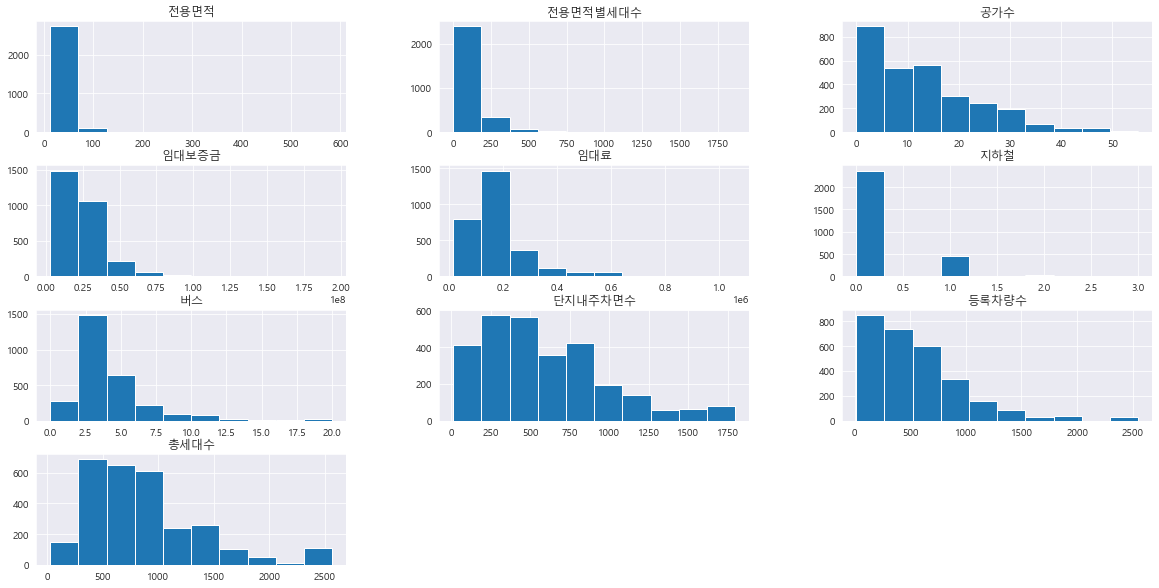

In [175]:
train_df.hist(figsize=(20,10))

In [176]:
train_df.describe()

,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총세대수
count,2866.000000,2866.000000,2866.000000,2.866000e+03,2.866000e+03,2866.000000,2866.000000,2866.000000,2866.000000,2866.000000
mean,44.408179,102.720167,12.915911,2.484995e+07,1.874178e+05,0.189812,3.710398,591.849616,550.028262,883.446964
std,32.086133,133.351793,10.685521,1.658567e+07,1.129471e+05,0.435246,2.677789,391.488716,430.679623,520.773466
min,12.620000,1.000000,0.000000,3.056000e+06,1.665000e+04,0.000000,0.000000,13.000000,13.000000,26.000000
25%,32.100000,14.000000,4.000000,1.563750e+07,1.203783e+05,0.000000,2.000000,277.000000,209.000000,504.000000
50%,39.840000,60.000000,11.000000,2.146840e+07,1.647700e+05,0.000000,3.000000,500.000000,479.000000,775.000000
75%,50.830000,142.750000,20.000000,2.727125e+07,2.060525e+05,0.000000,4.000000,812.000000,761.000000,1105.000000
max,583.400000,1865.000000,55.000000,1.940800e+08,1.058030e+06,3.000000,20.000000,1798.000000,2550.000000,2568.000000


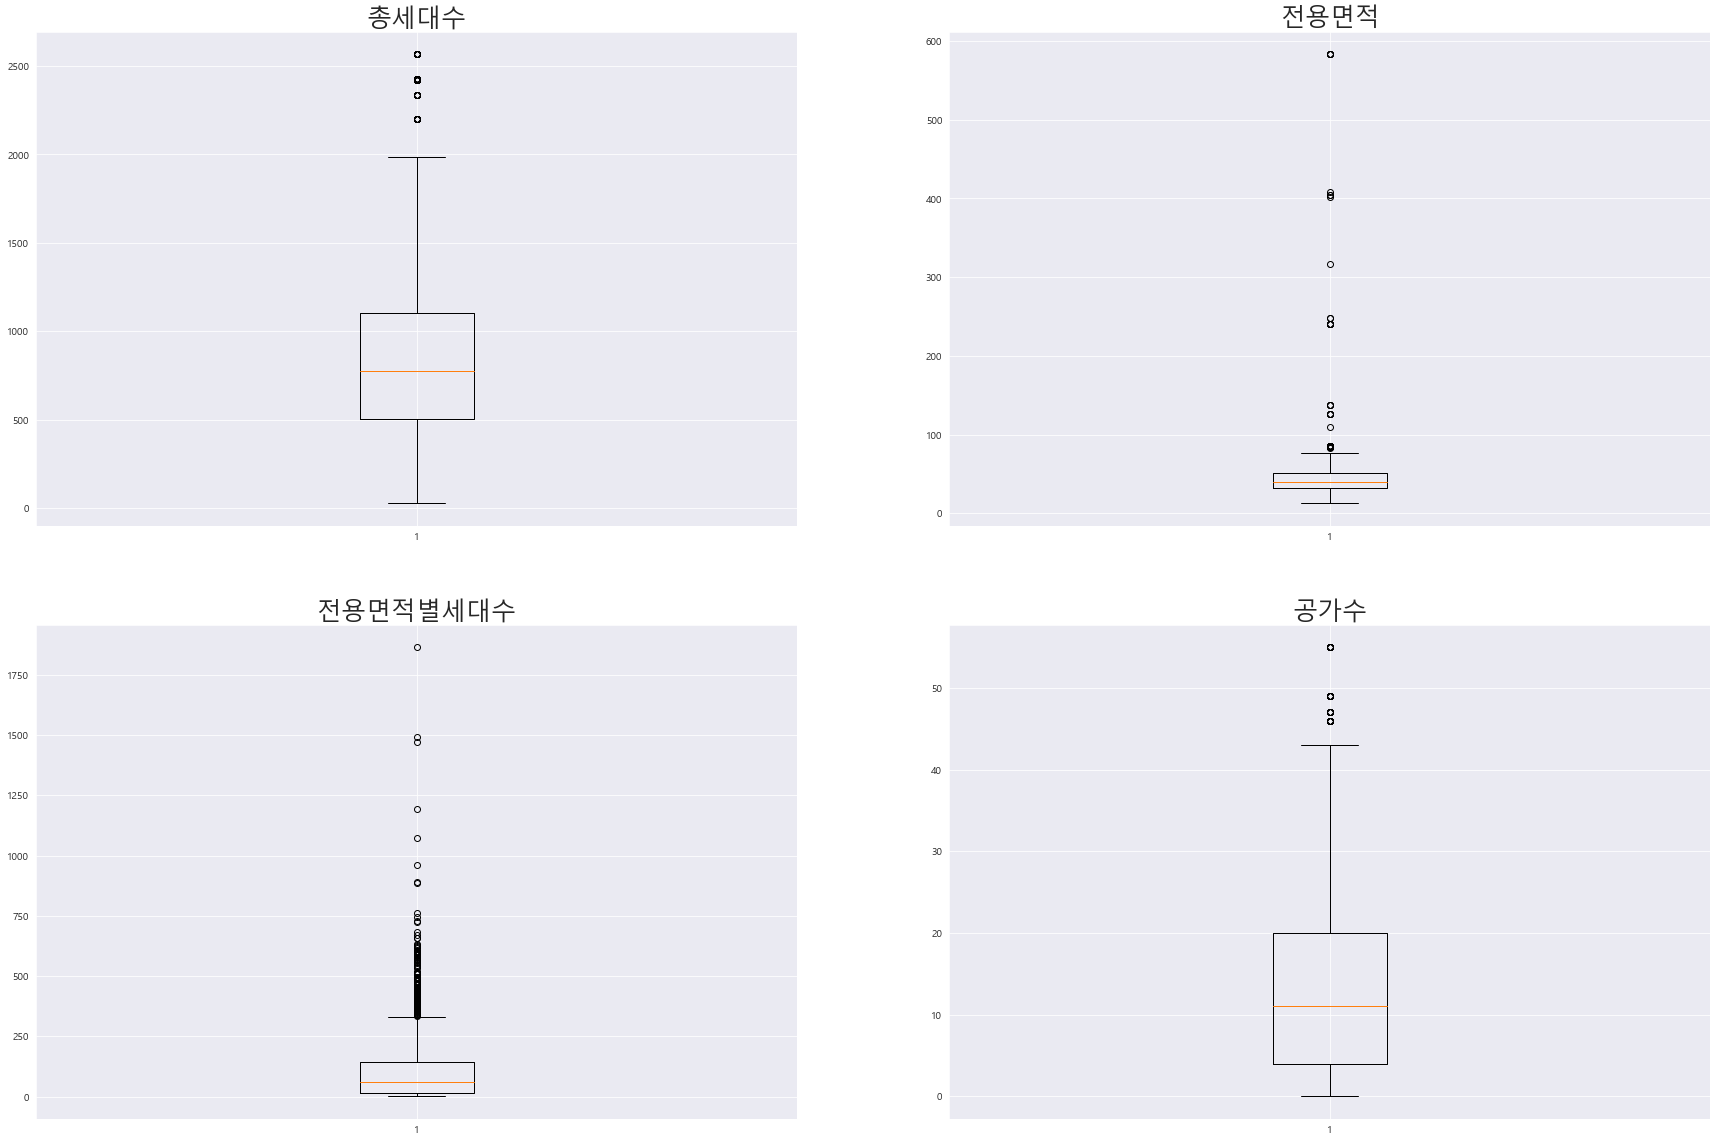

In [177]:
plt.figure(figsize=(30,20))
for i, c in enumerate(numeric_cols[:4]):
    ax = plt.subplot(221+i)
    ax.boxplot(train_df[c])
    ax.set_title(c, fontsize=25)

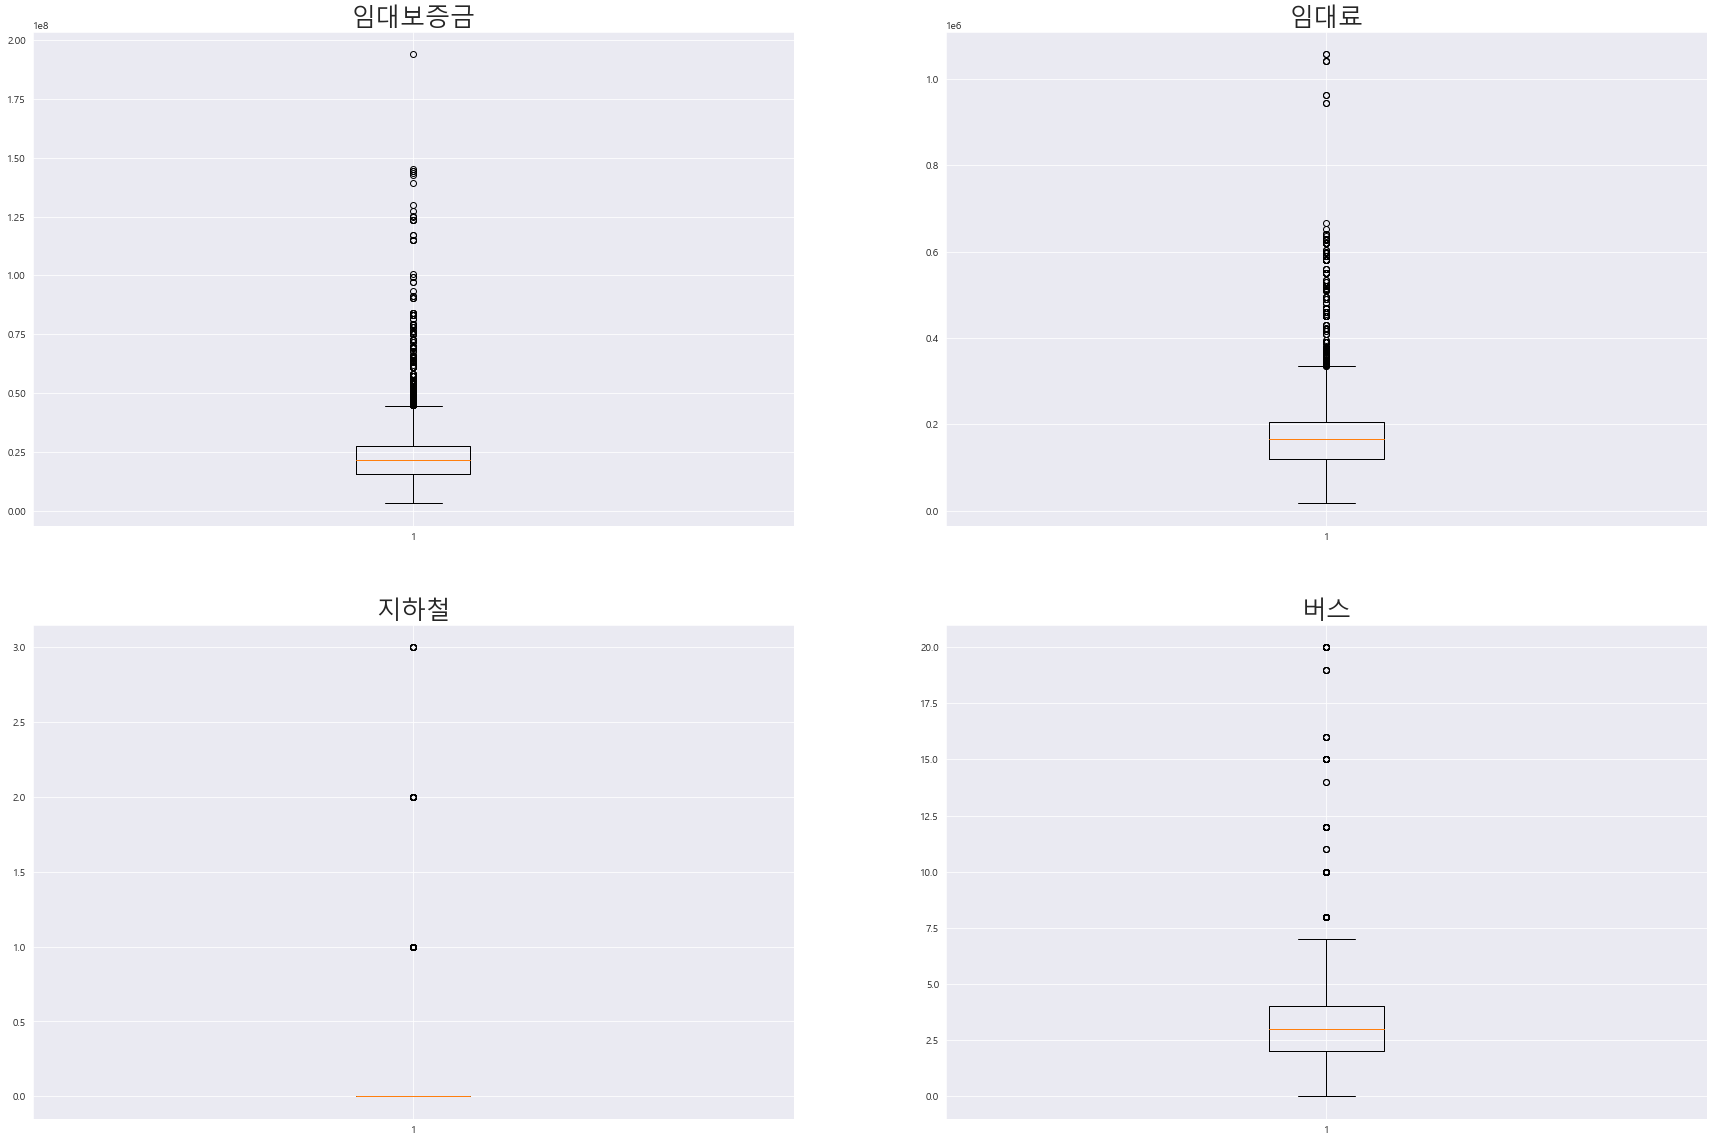

In [178]:
plt.figure(figsize=(30,20))
for i, c in enumerate(numeric_cols[4:8]):
    ax = plt.subplot(221+i)
    ax.boxplot(train_df[c])
    ax.set_title(c, fontsize=25)

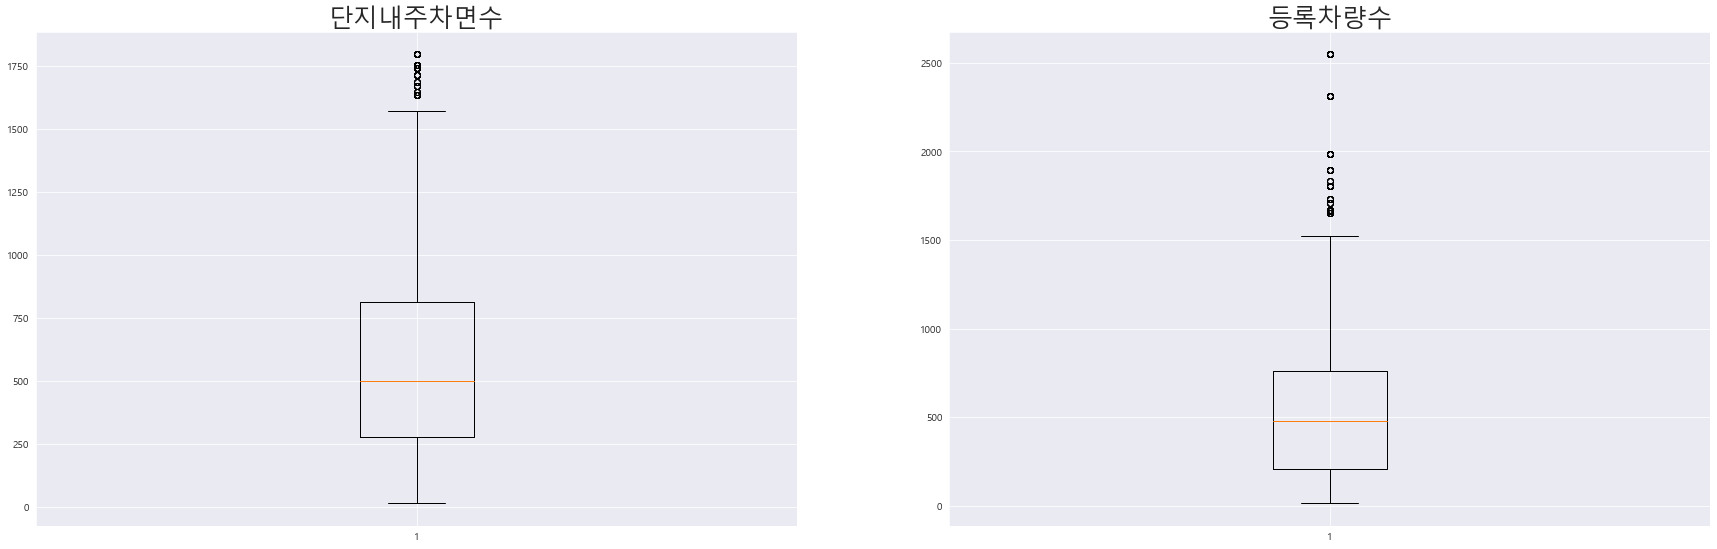

In [179]:
plt.figure(figsize=(30,20))
for i, c in enumerate(numeric_cols[8:]):
    ax = plt.subplot(221+i)
    ax.boxplot(train_df[c])
    ax.set_title(c, fontsize=25)

## 데이터 추출

In [180]:
# 전용면적합 = 전용면적 x 전용면적별세대수
train_df['전용면적합'] = train_df['전용면적'] * train_df['전용면적별세대수']
test_df['전용면적합'] = test_df['전용면적'] * test_df['전용면적별세대수']

In [181]:
# 임대보증금합 = 임대보증금 x 전용면적별세대수

train_df['임대보증금합'] = train_df['임대보증금'] * train_df['전용면적별세대수']
test_df['임대보증금합'] = test_df['임대보증금'] * test_df['전용면적별세대수']

In [182]:
train_df.drop(columns=['전용면적', '전용면적별세대수','임대료', '임대보증금'], inplace=True)
test_df.drop(columns=['전용면적', '전용면적별세대수','임대료', '임대보증금'], inplace=True)

In [183]:
cat_cols = ['임대건물구분', '지역', '공급유형', '자격유형']
num_cols = ['공가수', '자격유형', '지하철', '버스', '단지내주차면수', '총세대수', '전용면적합', '임대보증금합']

In [185]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for c in cat_cols:
    le.fit(train_df[c])
    train_df[c] = le.transform(train_df[c])
    train_df[c] = train_df[c].astype('category')
    test_df[c] = le.transform(test_df[c])
    test_df[c] = test_df[c].astype('category')

In [187]:
train_df.head()

,단지코드,임대건물구분,지역,공급유형,공가수,자격유형,지하철,버스,단지내주차면수,등록차량수,총세대수,전용면적합,임대보증금합
8,C2515,1,2,5,17.0,0,0.0,3.0,624.0,205.0,545,9240.48,2.543616e+09
9,C2515,1,2,5,17.0,0,0.0,3.0,624.0,205.0,545,2376.00,7.603200e+08
10,C2515,1,2,5,17.0,0,0.0,3.0,624.0,205.0,545,792.00,2.534400e+08
11,C2515,1,2,5,17.0,0,0.0,3.0,624.0,205.0,545,1782.20,7.004540e+08
12,C2515,1,2,5,17.0,0,0.0,3.0,624.0,205.0,545,891.10,3.502270e+08


In [188]:
train_df.columns

Index(['단지코드', '임대건물구분', '지역', '공급유형', '공가수', '자격유형', '지하철', '버스', '단지내주차면수',
       '등록차량수', '총세대수', '전용면적합', '임대보증금합'],
      dtype='object')

In [194]:
train_pivot =  train_df.pivot_table(index='단지코드', 
                        values=['임대건물구분', '지역', '공급유형', '공가수', '자격유형', 
                            '지하철', '버스', '단지내주차면수','등록차량수', '총세대수', '전용면적합', '임대보증금합'], 
                        aggfunc={'임대건물구분' : 'first', '지역':'first', '공급유형':'first', '공가수':'mean', '자격유형':'first',
                                 '지하철':'mean', '버스':'mean', '단지내주차면수':'mean','등록차량수':'first',
                                 '총세대수':'mean', '전용면적합':'sum', '임대보증금합':'mean'})

In [196]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_option = 1
if scaler_option == 1:
    mms = MinMaxScaler()
    mms.fit(train_pivot[num_cols])
    train_pivot[num_cols] = mms.transform(train_pivot[num_cols])
elif scaler_option == 2:
    ss = StandardScaler()
    ss.fit(train_pivot[num_cols])
    train_pivot[num_cols] = ss.transfrom(train_pivot[num_cols])

array([[<AxesSubplot:title={'center':'공가수'}>,
        <AxesSubplot:title={'center':'단지내주차면수'}>,
        <AxesSubplot:title={'center':'등록차량수'}>],
       [<AxesSubplot:title={'center':'버스'}>,
        <AxesSubplot:title={'center':'임대보증금합'}>,
        <AxesSubplot:title={'center':'자격유형'}>],
       [<AxesSubplot:title={'center':'전용면적합'}>,
        <AxesSubplot:title={'center':'지하철'}>,
        <AxesSubplot:title={'center':'총세대수'}>]], dtype=object)

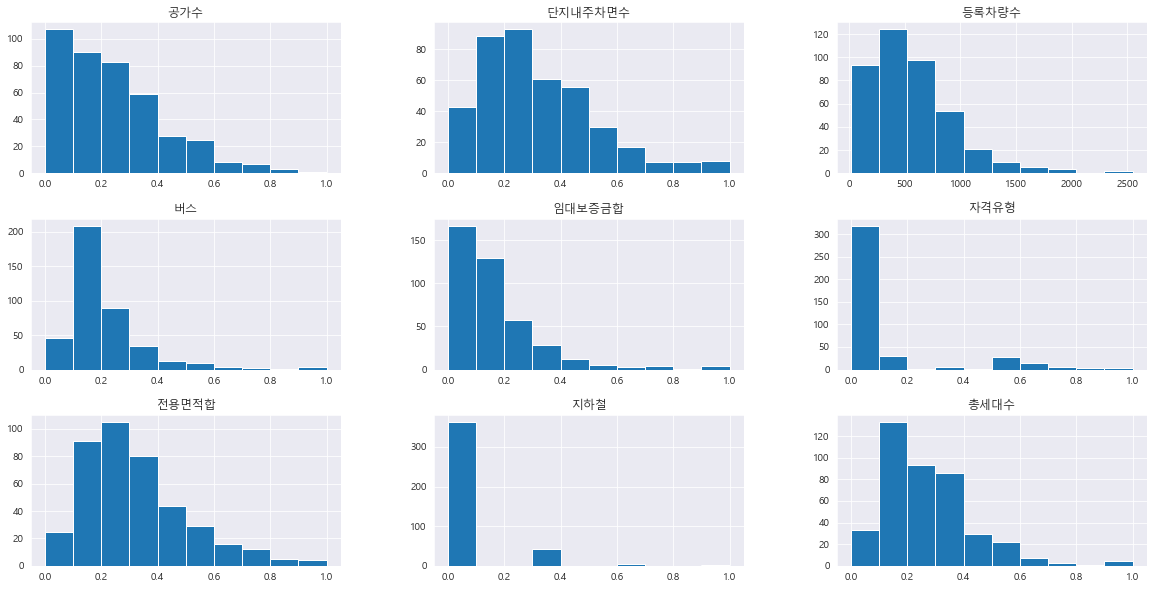

In [197]:
train_pivot.hist(figsize=(20,10))

In [198]:
train_pivot.corr()

,공가수,단지내주차면수,등록차량수,버스,임대보증금합,자격유형,전용면적합,지하철,총세대수
공가수,1.000000,0.395811,0.178797,0.061617,0.323048,0.258826,0.238402,-0.107852,0.297591
단지내주차면수,0.395811,1.000000,0.847504,0.104887,0.536409,-0.020915,0.863904,-0.004077,0.762461
등록차량수,0.178797,0.847504,1.000000,0.116681,0.505145,-0.114689,0.801715,-0.031969,0.580188
버스,0.061617,0.104887,0.116681,1.000000,0.179875,-0.037111,0.120658,0.100521,0.099372
임대보증금합,0.323048,0.536409,0.505145,0.179875,1.000000,-0.022599,0.542211,-0.009927,0.357724
자격유형,0.258826,-0.020915,-0.114689,-0.037111,-0.022599,1.000000,-0.110601,-0.004778,0.107437
전용면적합,0.238402,0.863904,0.801715,0.120658,0.542211,-0.110601,1.000000,0.059724,0.856978
지하철,-0.107852,-0.004077,-0.031969,0.100521,-0.009927,-0.004778,0.059724,1.000000,0.099997
총세대수,0.297591,0.762461,0.580188,0.099372,0.357724,0.107437,0.856978,0.099997,1.000000


In [200]:
train_pivot = train_pivot[['단지내주차면수', '임대보증금합', '전용면적합', '총세대수', '등록차량수']]

In [203]:
from sklearn.model_selection import train_test_split
X = train_pivot.iloc[:,:-1]
y = train_pivot['등록차량수']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=911)

In [205]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [212]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit  
from sklearn import ensemble

# Hyperparameter 조합 정의
param_grid = {'max_iter': [100, 250, 270, 300],
  'max_depth': [2, 3, 4],
   'min_samples_leaf': [70, 80, 90, 100, 110],
  'learning_rate': [0.05, 0.055, 0.06, 0.065],
  'loss': ['squared_error','absolute_error', 'poisson'],
  'early_stopping' : [False]} 

In [213]:
X = np.concatenate((X_train,X_test), axis=0)
y = np.concatenate((y_train,y_test), axis=0)
pds = PredefinedSplit(test_fold=[-1]*len(X_train)+[0]*len(X_test))
# grid search 모델 정의, 학습 및 model selection
grid_search = GridSearchCV(estimator=ensemble.HistGradientBoostingRegressor(), 
                   param_grid=param_grid, 
                   cv=pds, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=2)
grid_search.fit(X, y)
print(grid_search.best_params_)

Fitting 1 folds for each of 720 candidates, totalling 720 fits
{'early_stopping': False, 'learning_rate': 0.05, 'loss': 'absolute_error', 'max_depth': 2, 'max_iter': 300, 'min_samples_leaf': 70}


In [214]:
reg = ensemble.HistGradientBoostingRegressor(**grid_search.best_params_)
reg.fit(X_train, y_train)

mae = mean_absolute_error(y_test, reg.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

The mean absolute error (MAE) on test set: 134.1900


In [218]:
reg.score(X_test, y_test)

0.7280924330329759